## Import data

df

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
# Load CSV dataset
# df=pd.read_csv("/content/HousePriceDataset (1).csv")
# Load CSV in YW 
df=pd.read_csv("HousePriceDataset.csv")
print(f"Number of houses in dataset: {len(df)}")
print(f"Number of variables in dataset: {len(df.columns)}")
df=df.drop(columns=['Unnamed: 0'])
# Display the column names (features) in the dataset
print(f"Features in the dataset: {list(df.columns)}")

# Display basic statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

Number of houses in dataset: 21613
Number of variables in dataset: 21
Features in the dataset: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Summary Statistics:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.90000

## Data pre-processing
X is the data we want to use in dimensionality reduction and clustering

In [2]:
### Clean the data  'sqft_lot15'
def clean_data(value):
    if isinstance(value, str) and value.startswith("b'"):
        return float(value[2:-1])
    return float(value)

df['sqft_lot15'] = df['sqft_lot15'].apply(clean_data)
X = df.drop(['price','id'], axis=1)
y = df['price']

## Dimensionality reduction

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

2023-11-13 21:58:22.069184: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Data standardization

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## First reduction then clustering

PCA, AutoEncoder & T-SNE

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

/Users/wangyuhang/Documents/荷兰课程/Semester-3/IML/Final_Assignment/IML/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/wangyuhang/Documents/荷兰课程/Semester-3/IML/Final_Assignment/IML/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [6]:
# Split the data as training data and test data
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

input_dim = X_train.shape[1]  # Current dimensionality
encoding_dim = 2  # reduce to 2

# encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# autoencoder
autoencoder = Model(input_layer, decoded)

# model compile
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# training
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

# builde the encoder
encoder = Model(input_layer, encoded)

# 对数据进行降维
X_ae = encoder.predict(X_scaled)

Epoch 1/50


2023-11-13 22:05:06.931621: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


68/68 [==============================] - 1s 3ms/step - loss: 1.2342 - val_loss: 1.2762
Epoch 2/50
68/68 [==============================] - 0s 1ms/step - loss: 1.1863 - val_loss: 1.2160
Epoch 3/50
68/68 [==============================] - 0s 1ms/step - loss: 1.1171 - val_loss: 1.1407
Epoch 4/50
68/68 [==============================] - 0s 1ms/step - loss: 1.0487 - val_loss: 1.0827
Epoch 5/50
68/68 [==============================] - 0s 1ms/step - loss: 1.0026 - val_loss: 1.0474
Epoch 6/50
68/68 [==============================] - 0s 1ms/step - loss: 0.9740 - val_loss: 1.0253
Epoch 7/50
68/68 [==============================] - 0s 1ms/step - loss: 0.9546 - val_loss: 1.0094
Epoch 8/50
68/68 [==============================] - 0s 1ms/step - loss: 0.9399 - val_loss: 0.9970
Epoch 9/50
68/68 [==============================] - 0s 1ms/step - loss: 0.9278 - val_loss: 0.9865
Epoch 10/50
68/68 [==============================] - 0s 1ms/step - loss: 0.9176 - val_loss: 0.9774
Epoch 11/50
68/68 [===========

## Clustering

### K-means

In [12]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
# clustering on original dataset
kmeans_orig = KMeans(n_clusters=5, random_state=42)
k_clusters_orig = kmeans_orig.fit_predict(X_scaled)

# clustering on reduced dataset by pca
kmeans_pca = KMeans(n_clusters=5, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)
# Tsne
# clustering on reduced dataset by pca
kmeans_tsne = KMeans(n_clusters=5, random_state=42)
clusters_tsne = kmeans_pca.fit_predict(X_tsne)

# AutoEncoder
kmeans_ae = KMeans(n_clusters=5, random_state=42)
clusters_ae = kmeans_pca.fit_predict(X_ae)

In [74]:
import pandas as pd

# 假设 df 是包含价格和聚类标签的数据框
# 假设 'price' 是价格列，'kmeans_orig' 是一个聚类结果列

# 定义价格区间
bins = [0, 200000, 400000, 600000, 800000, float('inf')]
labels = ['0-200k', '200k-400k', '400k-600k', '600k-800k', '800k+']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels)

# 统计每个簇中不同价格区间的数量，并计算百分比
for col in ['kmeans_orig', 'kmeans_pca', 'kmeans_tsne', 'kmeans_ae']:
    print(f"Price range percentage distribution in clusters from {col}:")
    cluster_price_distribution = df.groupby(col)['price_range'].value_counts(normalize=True).unstack(fill_value=0) * 100
    print(cluster_price_distribution)



Price range percentage distribution in clusters from kmeans_orig:
               0-200k  200k-400k  400k-600k  600k-800k      800k+
kmeans_orig                                                      
0            0.000000   5.225387  21.664050  28.728414  44.382148
1            7.439077  42.511045  31.209919  13.567051   5.272909
2            3.281268  50.713563  33.711653   9.551635   2.741881
3            2.587177  22.722160  25.309336  16.985377  32.395951
4            1.146132  19.197708  39.255014  22.063037  18.338109
Price range percentage distribution in clusters from kmeans_pca:
               0-200k  200k-400k  400k-600k  600k-800k      800k+
kmeans_pca                                                       
0           10.915124  51.903598  29.235068   7.055536   0.890674
1            0.083565  15.487465  31.197772  27.660167  25.571031
2            0.000000   0.086957   4.521739   9.217391  86.173913
3            0.000000  18.100157  33.123737  29.530653  19.245453
4          

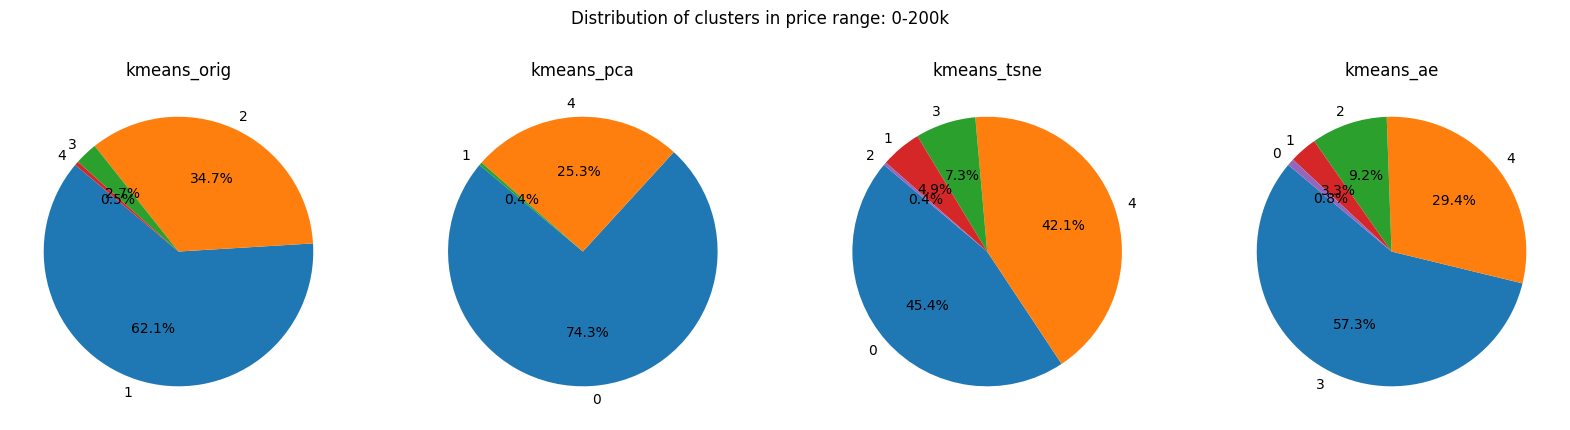

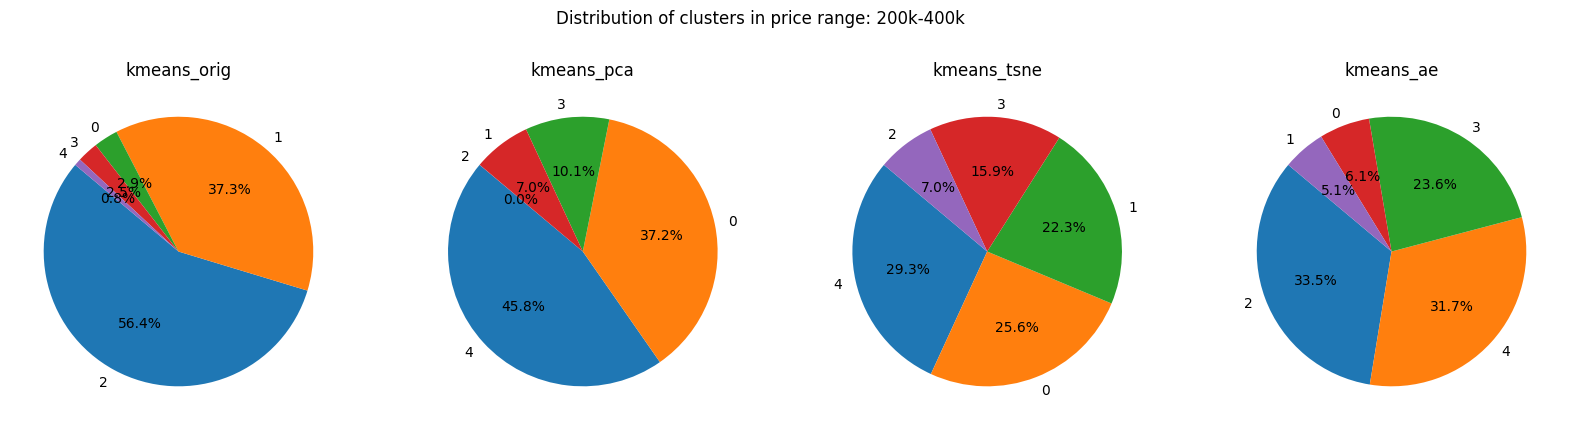

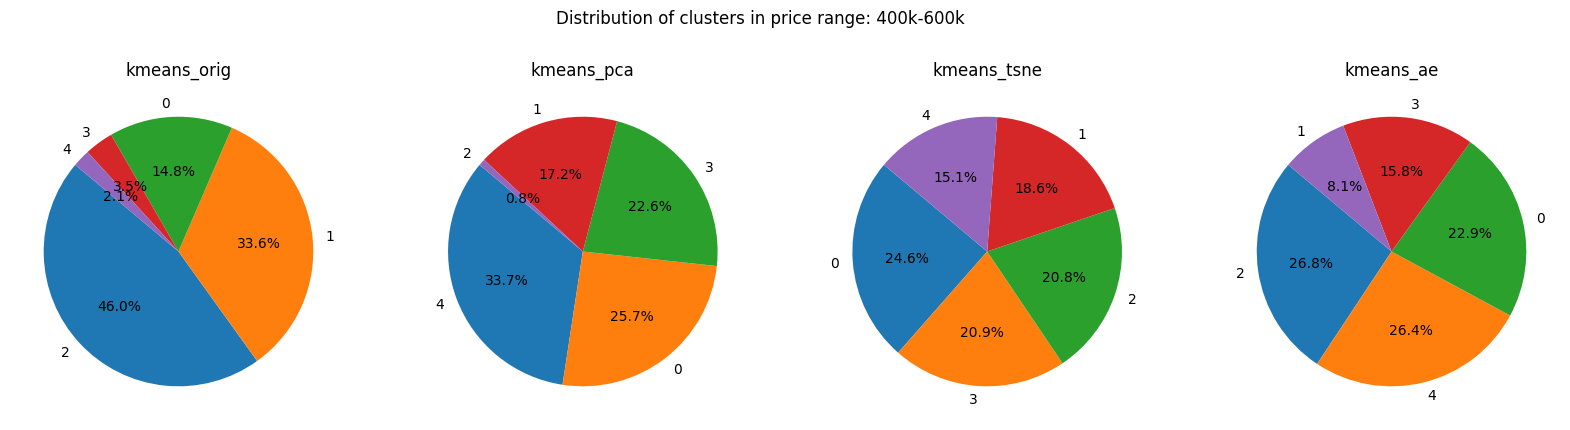

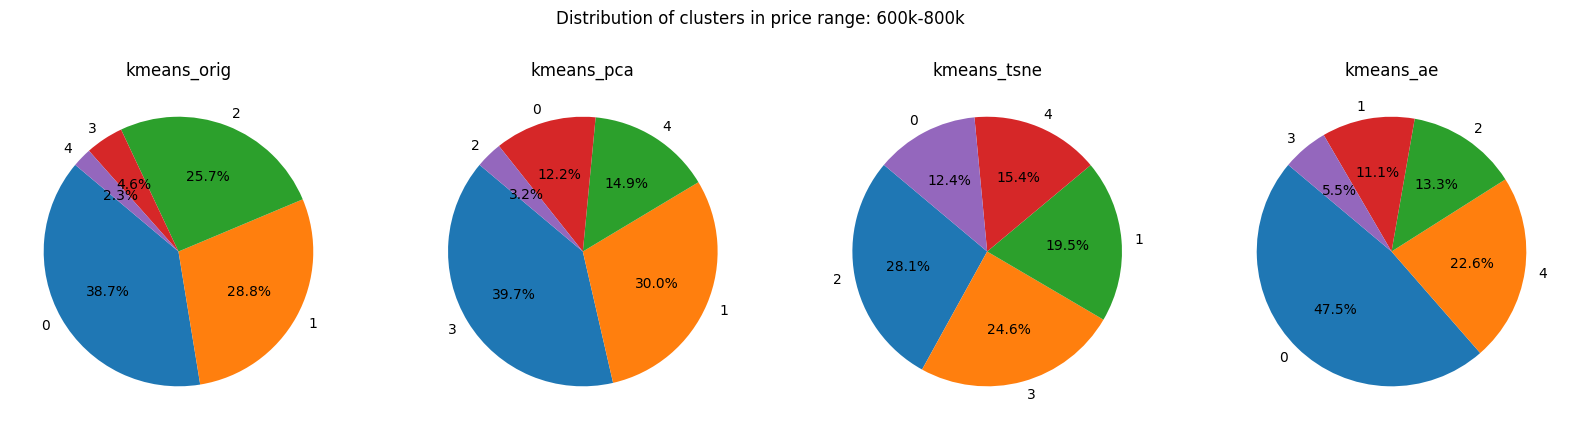

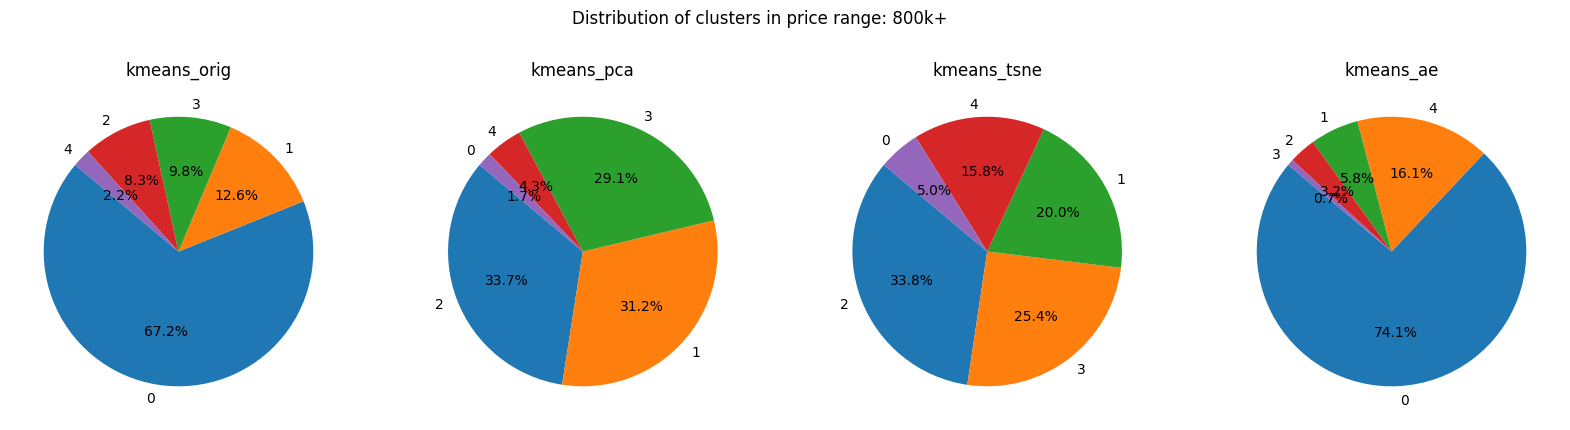

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 df 是包含价格信息的数据框
# 添加聚类结果到数据框中
df['kmeans_orig'] = k_clusters_orig
df['kmeans_pca'] = clusters_pca
df['kmeans_tsne'] = clusters_tsne
df['kmeans_ae'] = clusters_ae

# 定义价格区间
bins = [0, 200000, 400000, 600000, 800000, float('inf')]
labels = ['0-200k', '200k-400k', '400k-600k', '600k-800k', '800k+']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels)

# 绘制每个价格区间的饼图，对于每种聚类方法
cluster_methods = ['kmeans_orig', 'kmeans_pca', 'kmeans_tsne', 'kmeans_ae']
for label in labels:
    fig, axs = plt.subplots(1, len(cluster_methods), figsize=(20, 5))
    fig.suptitle(f'Distribution of clusters in price range: {label}')

    for i, method in enumerate(cluster_methods):
        data = df[df['price_range'] == label][method].value_counts()
        axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
        axs[i].set_title(method)
    
    plt.show()



### Hierarchical Clusering

In [13]:
H_orig = AgglomerativeClustering(n_clusters=5, linkage='ward')
H_clusters_orig = kmeans_pca.fit_predict(X_scaled)

H_pca = AgglomerativeClustering(n_clusters=5, linkage='ward')
H_clusters_pca = kmeans_pca.fit_predict(X_pca)

H_tsne = AgglomerativeClustering(n_clusters=5, linkage='ward')
H_clusters_tsne = kmeans_pca.fit_predict(X_tsne)

H_ae = AgglomerativeClustering(n_clusters=5, linkage='ward')
H_clusters_ae = kmeans_pca.fit_predict(X_ae)

## Data Visualization

In [58]:
import pandas as pd

y = df['price']

# Divide to 5 parts
price_bins, bin_edges = pd.qcut(y, 10, retbins=True, labels=False)

# Color five part price using 'coolwarm' colormap
colors = plt.cm.coolwarm(price_bins / max(price_bins)) 

def visualize_clusters_with_price(X, clusters, title):
    plt.figure(figsize=(8, 6))

    scatter = plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolor='k', s=50, cmap='coolwarm')

    # Use the actual price bin edges for the colorbar
    cbar = plt.colorbar(scatter, label='Price Range')
    cbar.set_ticks(np.linspace(0, 1, len(bin_edges)))
    cbar.set_ticklabels(["{:.2f}".format(edge) for edge in bin_edges])
    
    plt.title(title)
    plt.show()

In [68]:
import pandas as pd

y = df['price']

# 自定义价格区间
bins = [0, 200000, 400000, 600000, 800000, np.inf]
price_bins, bin_edges = pd.cut(y, bins, right=False, labels=False, retbins=True)

# Color five part price using 'coolwarm' colormap
colors = plt.cm.coolwarm(price_bins / max(price_bins))

def visualize_clusters_with_price(X, clusters, title):
    plt.figure(figsize=(8, 6))

    scatter = plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolor='k', s=50, cmap='coolwarm')

    # 设置颜色条
    cbar = plt.colorbar(scatter, label='Price Range')
    cbar.set_ticks(np.linspace(0, 1, len(bin_edges) - 1))  # 注意这里的改变
    cbar.set_ticklabels(['0-200k', '200-400k', '400-600k', '600-800k', '800+k'])

    plt.title(title)
    plt.show()


In [69]:
reduced_data = {
    'kmeans_pca': [X_pca, clusters_pca],
    'kmeans_tsne': [X_tsne, clusters_tsne],
    'kmeans_ae': [X_ae, clusters_ae],
    'Hierarchical_pca':[X_pca, H_clusters_pca],
    'Hierarchical_tsne':[X_tsne, H_clusters_tsne],
    'Hierarchical_ae':[X_ae, H_clusters_ae]
}

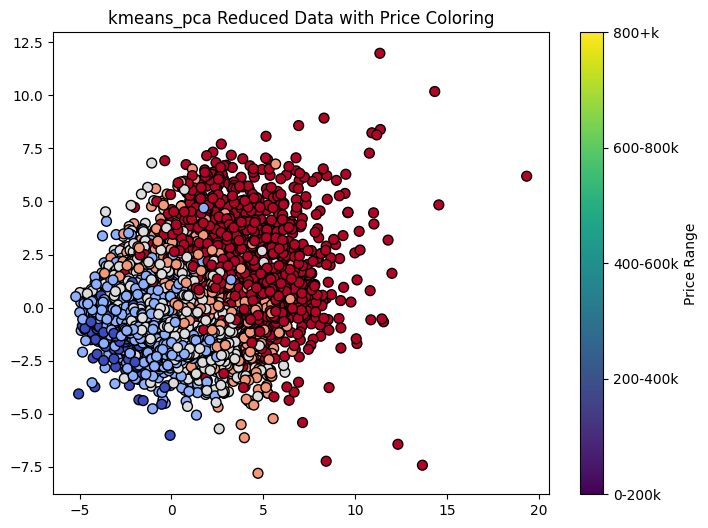

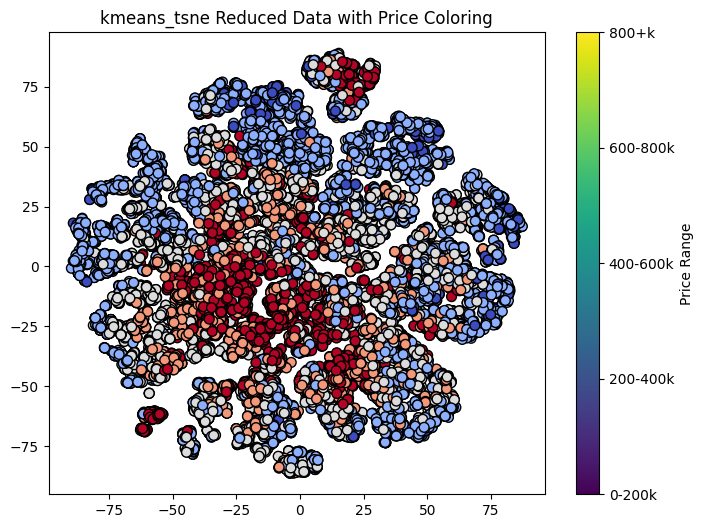

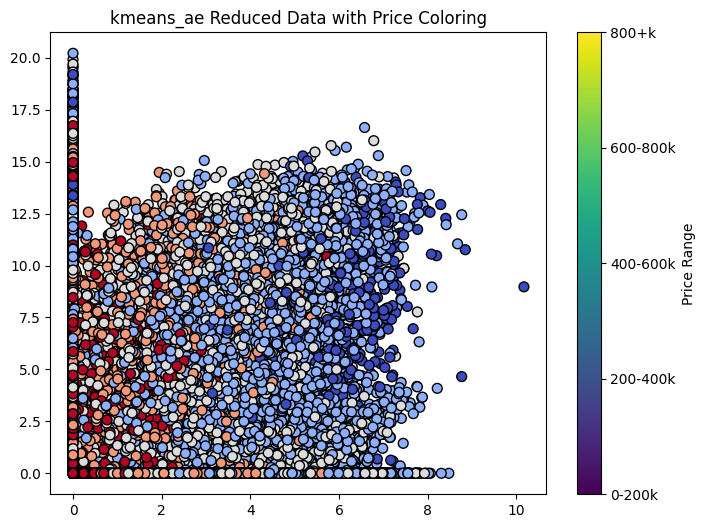

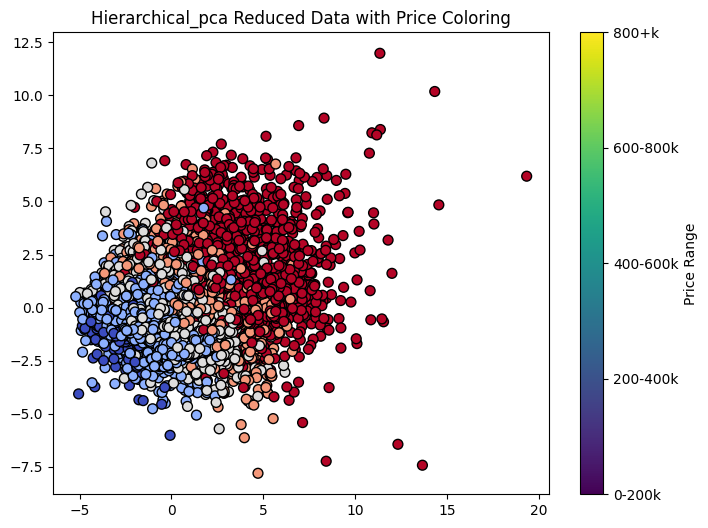

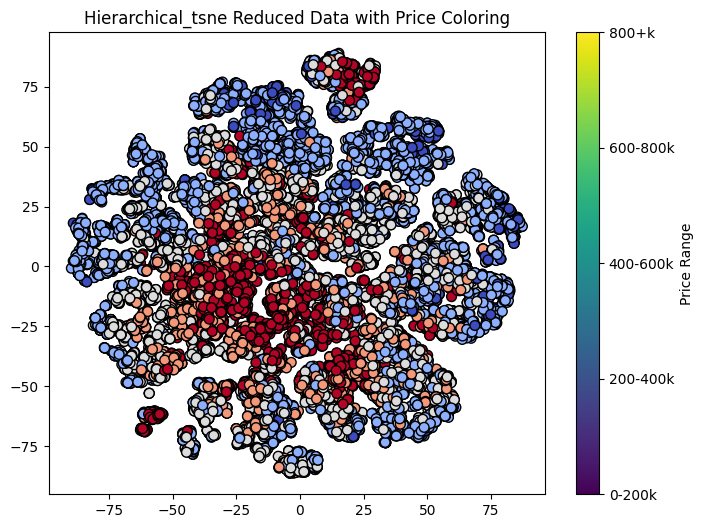

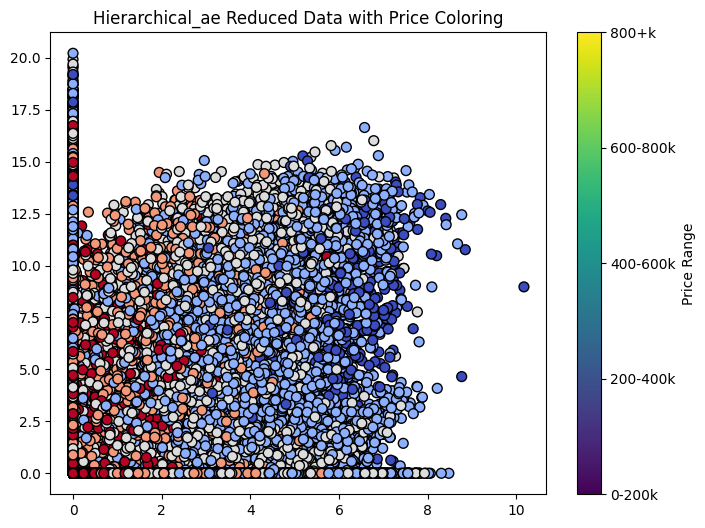

In [70]:
for key,values in reduced_data.items():
    name = key
    X = values[0]
    clusters = values[1]
    visualize_clusters_with_price(X, clusters, f'{name} Reduced Data with Price Coloring')

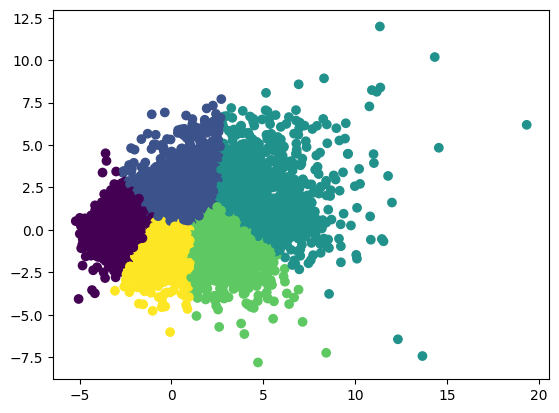

In [62]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca)
plt.show()

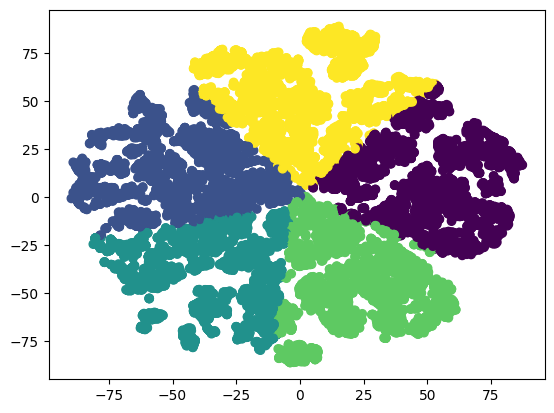

In [63]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_tsne)
plt.show()

## First clustering then reduction

In [55]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X_scaled)

X_with_clusters = np.column_stack((X_scaled, clusters))

pca = PCA(n_components=2)
K_X_pca = pca.fit_transform(X_with_clusters)

tsne = TSNE(n_components=2)
K_X_tsne = tsne.fit_transform(X_with_clusters)


/Users/wangyuhang/Documents/荷兰课程/Semester-3/IML/Final_Assignment/IML/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/wangyuhang/Documents/荷兰课程/Semester-3/IML/Final_Assignment/IML/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


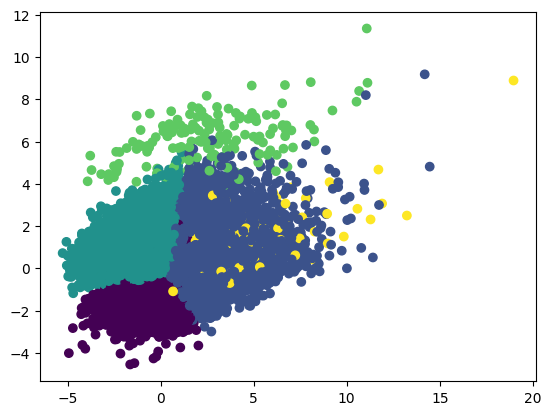

In [56]:
plt.scatter(K_X_pca[:, 0], K_X_pca[:, 1], c=clusters)
plt.show()

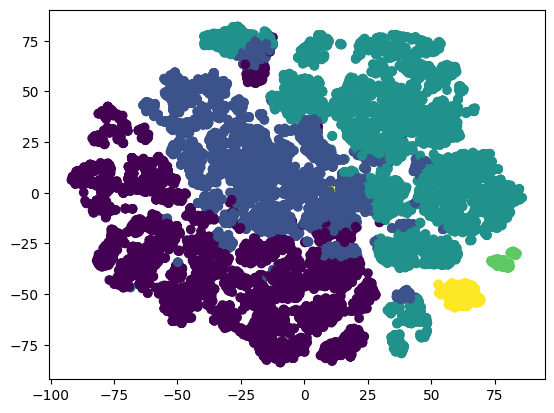

In [57]:
plt.scatter(K_X_tsne[:, 0], K_X_tsne[:, 1], c=clusters)
plt.show()